In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as  plt
import seaborn as sns 
import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')


C:\Users\shyam\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3134: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [4]:
df.shape

(300698, 53)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [6]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [7]:
df['City'].dropna(inplace=True)
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300693,30281872,03/29/2015 12:33:41 AM,NaN,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,NaN,CRESCENT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
300694,30281230,03/29/2015 12:33:28 AM,03/29/2015 02:33:59 AM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11418.0,100-17 87 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694077,-73.846087,"(40.69407728322387, -73.8460866160573)"
300695,30283424,03/29/2015 12:33:03 AM,03/29/2015 03:40:20 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11206.0,162 THROOP AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.699590,-73.944234,"(40.69959035300927, -73.94423377144169)"
300696,30280004,03/29/2015 12:33:02 AM,03/29/2015 04:38:35 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10461.0,3151 EAST TREMONT AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.837708,-73.834587,"(40.8377075854206, -73.83458731019586)"


In [8]:
df['Complaint Type'].dropna(inplace=True)

In [9]:
df['City'].fillna('Unknown City', inplace =True)
df['Location Type'].fillna('Unknown Location', inplace =True)

In [10]:
df['Created Date'] = pd.to_datetime(df['Created Date'])
df['Closed Date'] = pd.to_datetime(df['Closed Date'])

In [11]:
# creating a table as "Request_Closing_Time" ie. the difference of the created and closed date of a request

In [12]:
# the request closing time will be in minutes

In [13]:
df['Request_Closing_Time'] = (df['Closed Date'] - df['Created Date']).dt.total_seconds()

In [14]:
df['year'] = pd.DatetimeIndex(df['Created Date']).year
df['month']= pd.DatetimeIndex(df['Created Date']).month

In [15]:
diff_city=df['City'].unique()

In [16]:
diff_city

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'Unknown City',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [17]:
df['Request_Closing_Time'].isnull().sum()

2164

In [18]:
df['Request_Closing_Time'].fillna(0, inplace =True)

In [19]:
df['Request_Closing_Time'].isnull().sum()

0

In [20]:
complaint_type=df['Complaint Type'].unique()

In [21]:
common_month=df["month"].unique()
common_month

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3], dtype=int64)

here we can cleary see that our data has no compaints registered for January & February 

In [22]:
diff_year=df['year'].unique()
diff_year

array([2015], dtype=int64)

here the only year data we have is the "2015"


In [23]:
month_count=df['month'].value_counts().sort_values(ascending=True)
month_count

3      2471
4     27305
12    30521
11    30773
10    32605
7     34888
8     34956
6     35315
9     35427
5     36437
Name: month, dtype: int64

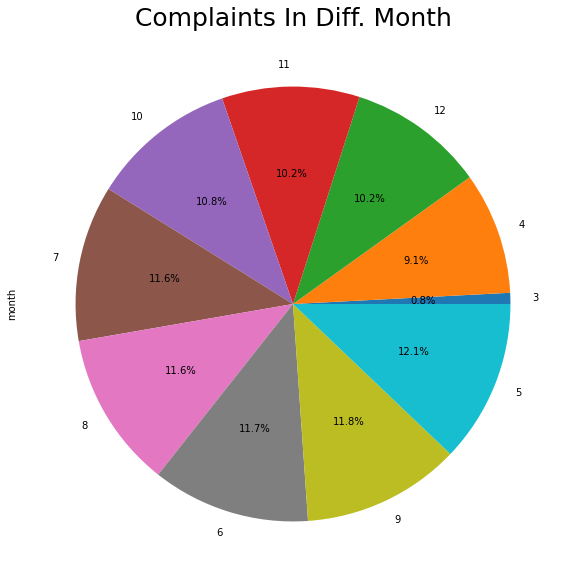

In [24]:
plt.figure(figsize = (15,10))
month_count.plot(kind='pie',autopct='%1.1f%%')
plt.title('Complaints In Diff. Month',fontsize=25)
plt.show()


The number states the index of the month in the calendar ex 3=March

In [25]:
complaint_type

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

In [26]:
complaints_count = df['Complaint Type'].value_counts()

In [27]:
complaints_count

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

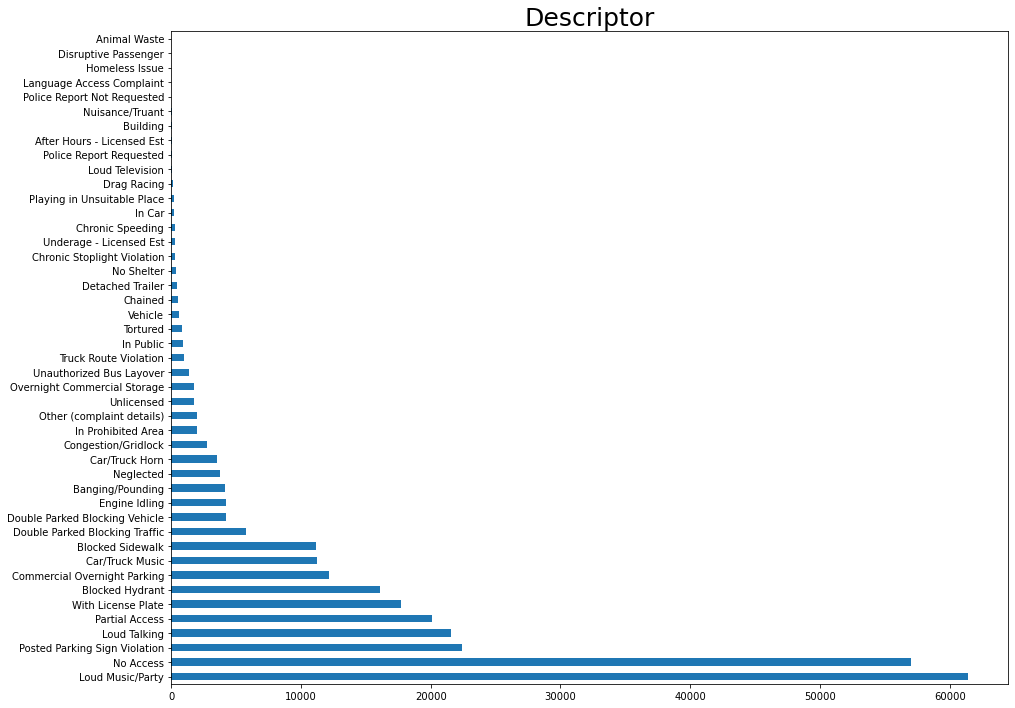

In [28]:
Descriptor_count = df['Descriptor'].value_counts().plot(kind='barh',figsize=(15,12))
plt.title('Descriptor',fontsize=25)
plt.show()

In [29]:
Descriptor_count

<AxesSubplot:title={'center':'Descriptor'}>

In [30]:
complaints_count

Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64

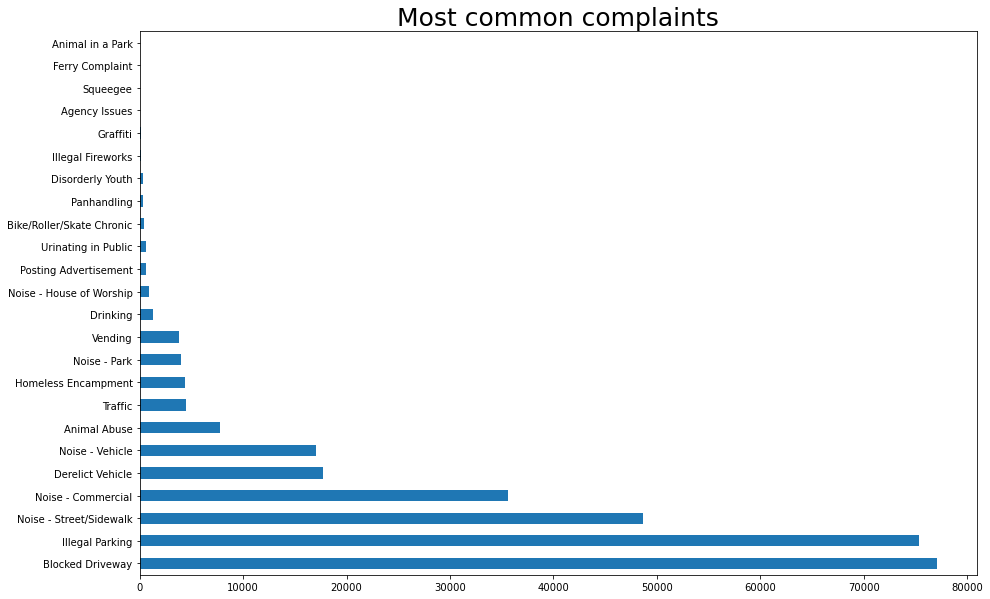

In [31]:
complaints_count = df['Complaint Type'].value_counts().plot(kind='barh',figsize=(15,10))
plt.title('Most common complaints',fontsize=25)
plt.show()


In [32]:
complaints_per_city = pd.crosstab(df["Complaint Type"], df["City"])

In [33]:
complaints_per_city

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,Unknown City,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Agency Issues,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,6,0,0,0,0
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,...,55,26,24,557,35,11,28,45,69,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,...,1,1,0,7,2,5,4,2,4,0
Blocked Driveway,35,2618,116,377,95,3,12755,28148,147,0,...,942,1548,262,2142,206,283,208,1060,1613,11
Derelict Vehicle,27,351,12,198,89,3,1953,5181,115,0,...,358,289,210,1766,10,171,227,308,247,2
Disorderly Youth,2,3,0,1,2,0,63,72,0,0,...,2,2,0,23,2,0,1,0,1,0
Drinking,1,35,0,1,1,1,188,257,0,0,...,13,23,6,175,10,8,2,3,15,0
Ferry Complaint,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0


In [34]:
total_sum_per_city=complaints_per_city.sum(axis = 0, skipna = True)
total_sum_per_city

City
ARVERNE                  220
ASTORIA                 6330
Astoria                  717
BAYSIDE                 1221
BELLEROSE                375
BREEZY POINT              30
BRONX                  40702
BROOKLYN               98307
CAMBRIA HEIGHTS          477
CENTRAL PARK              97
COLLEGE POINT           1220
CORONA                  4295
EAST ELMHURST           2734
ELMHURST                2673
East Elmhurst             14
FAR ROCKAWAY            1179
FLORAL PARK              152
FLUSHING                5971
FOREST HILLS            1688
FRESH MEADOWS           1899
GLEN OAKS                306
HOLLIS                  1012
HOWARD BEACH             931
Howard Beach               1
JACKSON HEIGHTS         1689
JAMAICA                 7296
KEW GARDENS              771
LITTLE NECK              559
LONG ISLAND CITY        2437
Long Island City         134
MASPETH                 2462
MIDDLE VILLAGE          1765
NEW HYDE PARK             98
NEW YORK               65994
OAKLAND G

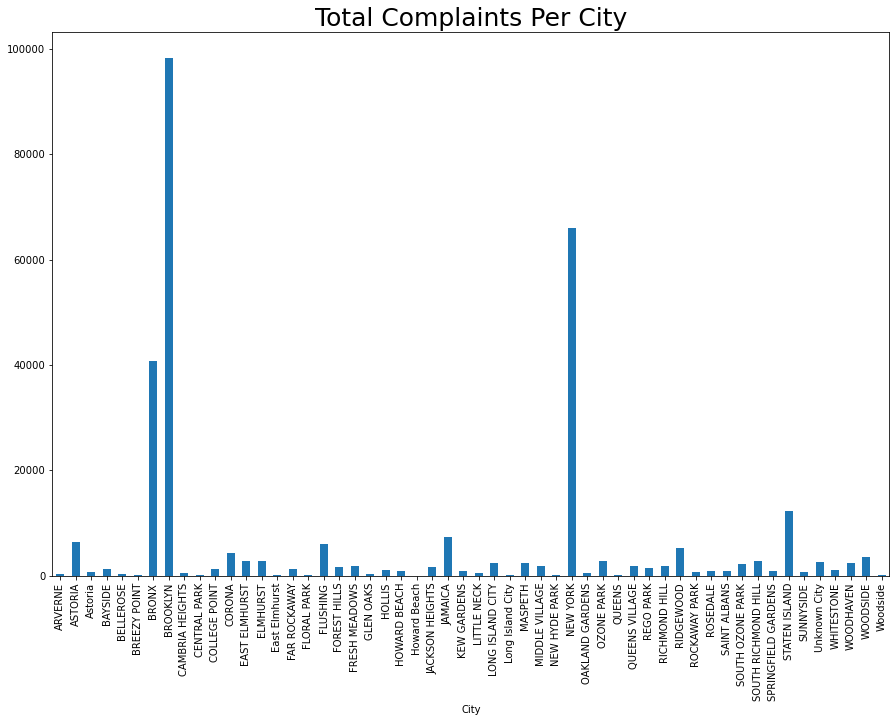

In [35]:
 
plt.figure(figsize = (15,10))
total_sum_per_city.plot(kind='bar',)
plt.title('Total Complaints Per City',fontsize=25)
plt.show()

In [36]:
agencies = df['Agency'].unique()

In [37]:
agencies

array(['NYPD'], dtype=object)

**This means that all the complains are attended by New York Police Department**
        

In [38]:
avg_res_time = df.groupby(['City','Complaint Type',]).Request_Closing_Time.mean()

In [39]:
avg_res_time

City      Complaint Type         
ARVERNE   Animal Abuse                7753.052632
          Blocked Driveway            9093.485714
          Derelict Vehicle           10685.592593
          Disorderly Youth           12928.500000
          Drinking                     859.000000
                                         ...     
Woodside  Blocked Driveway           23062.363636
          Derelict Vehicle           17880.000000
          Illegal Parking            18789.130000
          Noise - Commercial          8619.000000
          Noise - Street/Sidewalk    12280.600000
Name: Request_Closing_Time, Length: 782, dtype: float64

In [40]:
avg_response_time = df.groupby(['Complaint Type']).Request_Closing_Time.mean().sort_values(ascending=True)

In [41]:
avg_res_time

City      Complaint Type         
ARVERNE   Animal Abuse                7753.052632
          Blocked Driveway            9093.485714
          Derelict Vehicle           10685.592593
          Disorderly Youth           12928.500000
          Drinking                     859.000000
                                         ...     
Woodside  Blocked Driveway           23062.363636
          Derelict Vehicle           17880.000000
          Illegal Parking            18789.130000
          Noise - Commercial          8619.000000
          Noise - Street/Sidewalk    12280.600000
Name: Request_Closing_Time, Length: 782, dtype: float64

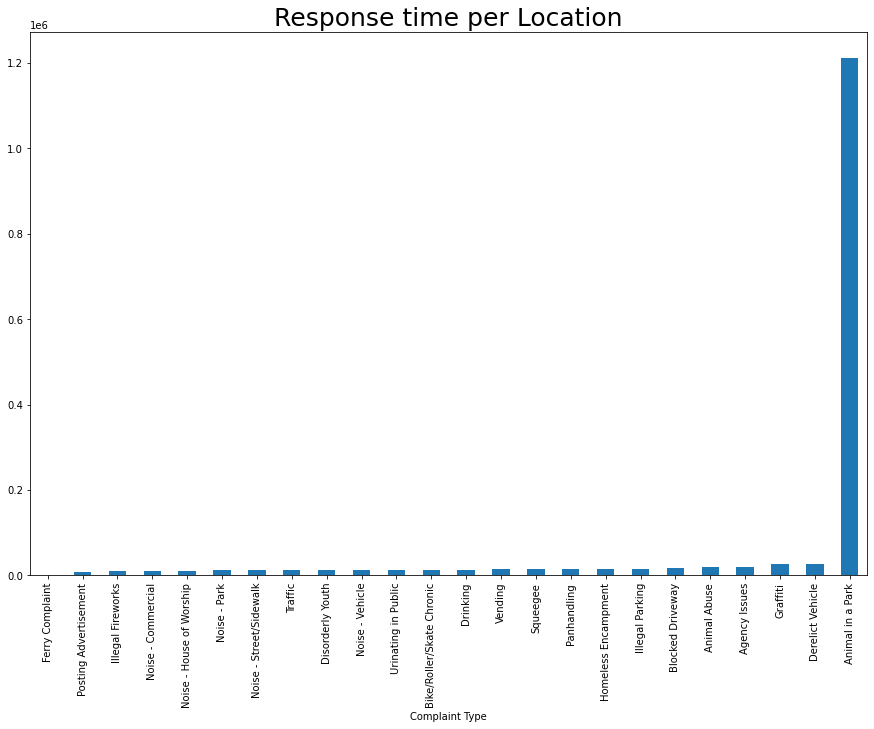

In [42]:
plt.figure(figsize=(15,10))
avg_response_time.plot(kind='bar')
plt.title('Response time per Location',fontsize=25)
plt.show()

In [43]:
avg_response_time.head(23)

Complaint Type
Ferry Complaint                  0.000000
Posting Advertisement         7091.006154
Illegal Fireworks             9940.101190
Noise - Commercial           11224.665065
Noise - House of Worship     11471.178303
Noise - Park                 12217.881742
Noise - Street/Sidewalk      12266.052292
Traffic                      12409.731659
Disorderly Youth             12810.902098
Noise - Vehicle              12882.559796
Urinating in Public          13055.991554
Bike/Roller/Skate Chronic    13464.000000
Drinking                     13848.291406
Vending                      14423.502630
Squeegee                     14564.250000
Panhandling                  15639.410423
Homeless Encampment          15716.052536
Illegal Parking              16025.893619
Blocked Driveway             17015.421525
Animal Abuse                 18743.548599
Agency Issues                18937.166667
Graffiti                     25744.504425
Derelict Vehicle             26316.387685
Name: Request_Closi

**Statistical Test**

Average response time across complaint types is similar or not (overall)
From the above data, its observed that the average resolution time across the complaint types are not equal.

But, the following complaint types have response time which were too close.

Noise - Park                 12217.881742
Noise - Street/Sidewalk      12266.052292

Null Hypothesis(H0) - Average response time across complaint types are equal Alternate Hypothesis(H1) - Average response time across complaint types are not equal

As here we have more than two categorical varaiable with a continuous variable
Let's perform one way ANOVA for the above group of complaints

In [44]:
Noise_Park = df[df['Complaint Type'] == 'Noise - Park']
Noise_Park  = Noise_Park .loc[:,['Request_Closing_Time']]

In [45]:
Noise_Park.head()

,Request_Closing_Time
389,523.0
593,2190.0
1357,44296.0
3163,61564.0
3834,6859.0


In [58]:
df_street = df[df['Complaint Type'] == 'Noise - Street/Sidewalk']
df_street = df_street.loc[:,['Request_Closing_Time']]

In [59]:
df_street.head()

,Request_Closing_Time
0,3315.0
12,8937.0
19,2825.0
38,1768.0
54,5384.0


In [60]:
import scipy.stats as stats

In [61]:
 pvalue = stats.f_oneway(df_street,Noise_Park)

In [62]:
pvalue

F_onewayResult(statistic=array([0.0234834]), pvalue=array([0.87820727]))

H0 is null hypothesis, ie they are not similar

H1 is alteranate hypothesis, ie they are similar

Here pvalue > 0.05 
accept the null hypothesis & reject the alternate hypothesis



**Result Average response time across complaint types is NOT similar**


Are the type of complaint or service requested and location related?
As we are having two categorical features we need to perfrom the chi square test 


In [64]:
df_city =  pd.crosstab(df["City"],df["Complaint Type"])
df_city 

Complaint Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Ferry Complaint,Graffiti,...,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,38,0,0,35,27,2,1,0,1,...,11,2,29,7,1,0,0,0,1,1
ASTORIA,0,125,0,15,2618,351,3,35,0,4,...,19,61,386,204,1,1,0,47,9,54
Astoria,0,0,0,0,116,12,0,0,0,0,...,0,0,114,0,0,0,0,0,0,0
BAYSIDE,0,37,0,0,377,198,1,1,0,3,...,2,4,15,16,0,0,0,9,0,2
BELLEROSE,0,7,0,1,95,89,2,1,0,0,...,1,1,13,10,1,1,0,7,1,0
BREEZY POINT,0,2,0,0,3,3,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
BRONX,0,1415,0,20,12755,1953,63,188,0,9,...,79,547,8892,3396,19,17,0,355,51,379
BROOKLYN,0,2394,0,111,28148,5181,72,257,0,43,...,340,1555,13356,5177,49,45,0,1085,136,515
CAMBRIA HEIGHTS,0,11,0,0,147,115,0,0,0,0,...,2,0,25,77,0,0,0,6,0,0


In [65]:
from scipy.stats import chi2_contingency

In [66]:
table = df_city

# Get chi-square value , p-value, degrees of freedom, expected frequencies using the function chi2_contingency
stat, p, dof, expected = chi2_contingency(table)

# select significance value
alpha = 0.05

# Determine whether to reject or keep your null hypothesis
print('significance=%.3f, p=%.3f' % (alpha, p ))
if p <= alpha:
    print(' complaint type and city are related ') #H0 is null hypothesis, ie they are not related
else:
    print('complaint type and city are not related') #H1 is alteranate hypothesis, ie they are related

significance=0.050, p=0.000
 complaint type and city are related 
